In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [6]:
num_cols = df.select_dtypes(include=np.number).columns
print(num_cols)

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [9]:
for col in num_cols:
  df[df[col] < 0] = np.nan

In [10]:
for col in df.columns:
  df = df[df[col] != '?']

In [11]:
df.shape

(569, 32)

<Axes: ylabel='radius_mean'>

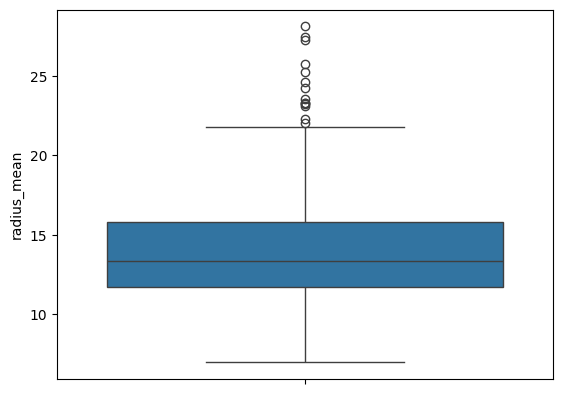

In [13]:
import seaborn as sns

sns.boxplot(data=df["radius_mean"])

<Axes: ylabel='texture_mean'>

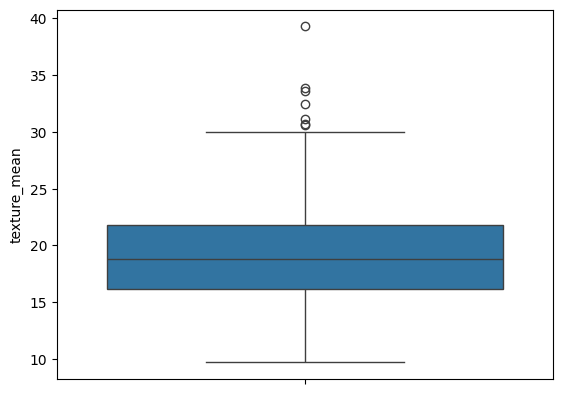

In [14]:
sns.boxplot(data=df["texture_mean"])

<Axes: ylabel='perimeter_se'>

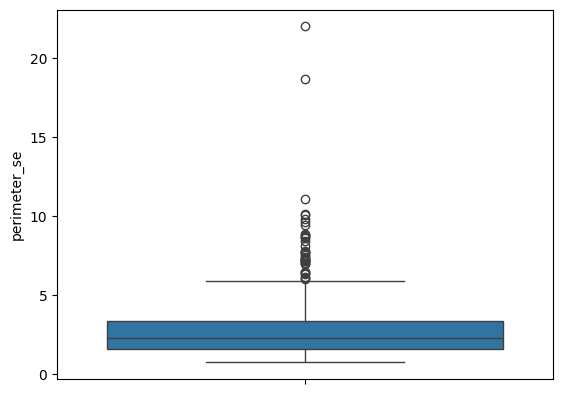

In [15]:
sns.boxplot(data=df["perimeter_se"])

In [17]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)

IQR = Q3-Q1

lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

for col in num_cols:
  df = df[(df[col] >= lower[col]) & (df[col] <=upper[col])]


In [18]:
print(df.shape)

(346, 32)


<Axes: ylabel='radius_mean'>

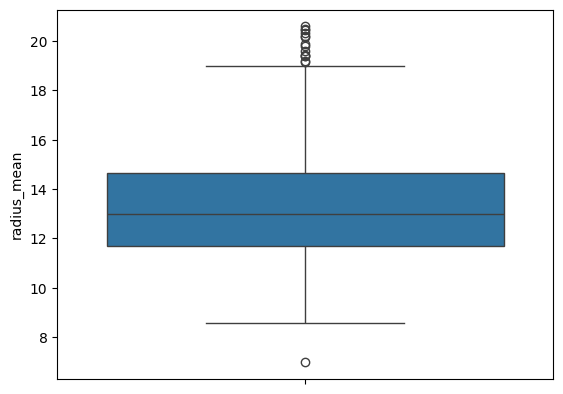

In [19]:
sns.boxplot(data=df["radius_mean"])


<Axes: ylabel='perimeter_se'>

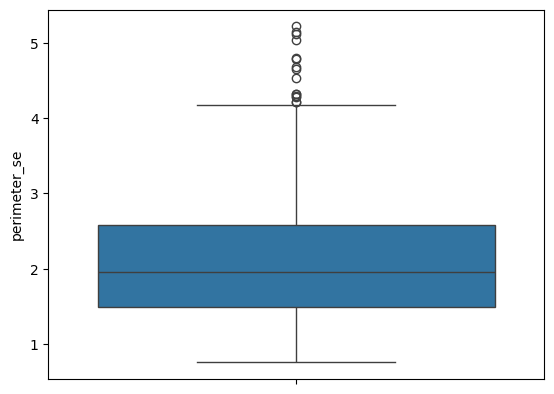

In [20]:
sns.boxplot(data=df["perimeter_se"])

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["diagnosis"] = le.fit_transform(df["diagnosis"])

In [22]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
10,845636,1,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
13,846381,1,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287
16,848406,1,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,...,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.2914,0.16090,0.3029,0.08216
19,8510426,0,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,...,15.11,19.26,99.70,711.2,0.1440,0.1773,0.2390,0.12880,0.2977,0.07259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,924632,0,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242
555,924934,0,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283
558,925277,0,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
560,925292,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321


In [26]:
sccols = ['radius_mean',
'texture_mean',
'perimeter_mean',
'area_mean',
'smoothness_mean',
'compactness_mean',
'concavity_mean',
'concave points_mean',
'symmetry_mean',
'fractal_dimension_mean',
'radius_se',
'texture_se',
'perimeter_se',
'area_se',
'smoothness_se',
'compactness_se',
'concavity_se',
'concave points_se',
'symmetry_se',
'fractal_dimension_se',
'radius_worst',
'texture_worst',
'perimeter_worst',
'area_worst',
'smoothness_worst',
'compactness_worst',
'concavity_worst',
'concave points_worst',
'symmetry_worst']

df_scaled = df.copy()
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_cols = sc.fit_transform(df[sccols])

df_scaled[sccols] = scaled_cols

In [28]:
df_scaled

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,844359,1,1.956415,0.391738,1.967102,2.095166,0.125767,0.672519,1.094857,1.522340,...,2.426173,0.528876,2.474417,2.673599,0.781066,0.451196,1.143602,1.975202,0.666392,0.08368
10,845636,1,1.064026,1.223373,0.968887,1.016340,-0.918065,-0.560280,-0.558764,-0.090192,...,1.284102,1.634498,1.148017,1.290266,-0.512230,-0.522075,-0.453411,0.087174,0.395649,0.08452
13,846381,1,0.995996,1.404496,1.027953,0.949081,-0.756134,0.416111,0.818527,0.717063,...,0.556768,0.528876,0.615652,0.460570,-0.759988,-0.167900,0.139373,0.332648,0.068404,0.06287
16,848406,1,0.527792,0.430003,0.498722,0.511670,0.461255,-0.405561,0.290970,0.675534,...,1.246962,1.101240,1.129971,1.253863,0.890080,-0.218225,0.546010,1.322625,0.586346,0.08216
19,8510426,0,0.071593,-1.041940,0.068721,-0.014825,0.388179,-0.134875,0.139321,0.486475,...,0.021325,-0.964247,0.060730,-0.040888,0.771156,-0.311279,0.186081,0.674089,0.463924,0.07259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,924632,0,-0.192522,2.672356,-0.224246,-0.246448,-0.986990,-0.806490,0.042024,-0.477800,...,-0.356270,1.965118,-0.429226,-0.391272,-0.284293,-0.456557,0.219739,-0.616316,-0.960419,0.07242
555,924934,0,-1.228974,2.338172,-1.218326,-1.105678,-0.233803,-0.272112,0.001363,-0.321570,...,-1.300257,1.817584,-1.298604,-1.113578,0.493667,-0.371100,-0.081805,-0.084153,-1.304145,0.08283
558,925277,0,0.491776,1.080515,0.596180,0.389623,-0.696344,1.371814,0.891551,0.073158,...,0.135842,0.459553,0.340447,0.026762,-1.280280,1.016167,1.059802,0.304363,-1.228808,0.08004
560,925292,0,0.275682,2.220824,0.300260,0.137066,0.512741,0.777413,-0.317495,0.297813,...,0.080131,1.508294,0.083288,-0.054539,-0.214921,0.154941,-0.544767,0.189202,-1.247642,0.08321


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


X = df.drop(["id","diagnosis"], axis=1)
y = df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [34]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(accuracy_score(y_pred_lr, y_test))

0.9310344827586207


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(accuracy_score(y_pred_nb, y_test))

0.8735632183908046
